<a href="https://colab.research.google.com/github/sztyberj/Zaawansowane-przetwarzanie-i-integracja-danych---sem.6/blob/main/Zadanie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadanie 2
Opracować eksperyment uczenia maszynowego dla regresji liniowej


In [ ]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 

In [ ]:
#Load data
data = pd.read_csv('https://raw.githubusercontent.com/sztyberj/Zaawansowane-przetwarzanie-i-integracja-danych---sem.6/main/Data/HousingPrices-Amsterdam-August-2021.csv')
data.head(5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.000,64,3,4.908,52.356
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.000,60,3,4.850,52.349
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.000,109,4,4.945,52.344
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.000,128,6,4.790,52.344
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.000,138,5,4.903,52.411


In [ ]:
#Get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
#Rename column
data['Unnamed: 0'].replace('Unndamed: 0', 'ID', inplace=True)

In [ ]:
#Get info about the most important data
pd.set_option('display.float_format',  lambda x: '%.3f' % x)
print(data.Price.describe(), data.Area.describe(), data.Room.describe())

count       920.000
mean     622065.420
std      538994.175
min      175000.000
25%      350000.000
50%      467000.000
75%      700000.000
max     5950000.000
Name: Price, dtype: float64 count   924.000
mean     95.952
std      57.447
min      21.000
25%      60.750
50%      83.000
75%     113.000
max     623.000
Name: Area, dtype: float64 count   924.000
mean      3.571
std       1.592
min       1.000
25%       3.000
50%       3.000
75%       4.000
max      14.000
Name: Room, dtype: float64


In [ ]:
#Drop NA values, reset index
data.dropna(inplace = True)
data = data.reset_index()

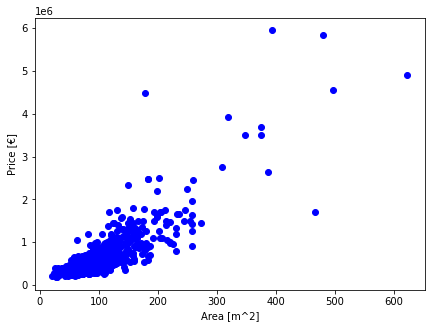

In [ ]:
#Create plot
plt.figure(figsize=(7,5))
plt.xlabel('Area [m^2]')
plt.ylabel('Price [€]')
plt.scatter(data.Area, data.Price, color='blue')

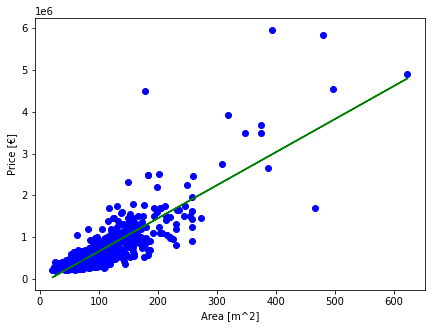

In [ ]:
#Simple linear regression
lr = LinearRegression()
lr.fit(X = data.Area.values.reshape(-1,1), y = data.Price.values)

price_pred = lr.predict(X = data.Area.values.reshape(-1, 1))

plt.figure(figsize=(7, 5))
plt.xlabel('Area [m^2]')
plt.ylabel('Price [€]')

plt.scatter(data.Area, data.Price, color='blue')
plt.plot(data.Area, price_pred, color='green')



In [ ]:
#New area values
new_area_val = np.array([50, 200, 400, 500])
new_price_pred = lr.predict(new_area_val.reshape(-1,1))
new_price_pred

array([ 260966.17591107, 1448594.47077683, 3032098.86393117,
       3823851.06050834])

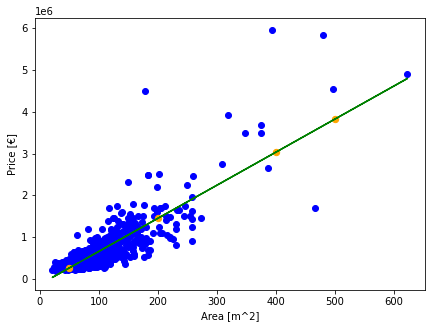

In [ ]:
plt.figure(figsize=(7, 5))
plt.xlabel('Area [m^2]')
plt.ylabel('Price [€]')

plt.scatter(data.Area, data.Price, color='blue')
plt.plot(data.Area, price_pred, color='green')
plt.scatter(new_area_val, new_price_pred, color='orange', s=40)